In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import precision_recall_fscore_support
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from imblearn.over_sampling import SMOTE

In [4]:
import pandas as pd
data = pd.read_excel("/content/GP2F.xlsx")

In [ ]:
data.head()

,PatientID,InsuranceType,Age,Gender,Bacteria,SpecimenType,SensitivityResult,AdmissionPeriod,Hospital,DiagnosisDateTime,Antibiotics,AdministrationMethod,Dosage,Prescription,StartDate,End date,TreatmentTime,Antibiotic_Family,City
0,12332,0,52,f,Pseudomonas aeruginosa,Vagina,S,15,Prince Hamzah Hospital,2011-01-27,VANCOMYCIN HCL 500MG/VIAL INJ,INTRAVENOUS,500MG/1IL,Q24H,2018-02-07,2018-02-08,1,Glycopeptides,Amman
1,12332,0,52,f,Pseudomonas aeruginosa,Vagina,S,15,Prince Hamzah Hospital,2011-01-27,VANCOMYCIN HCL 500MG/VIAL INJ,INTRAVENOUS,500MG/1IL,Q24H,2018-02-07,2018-02-08,1,Glycopeptides,Amman
2,12332,0,52,m,Klebsiella oxytoca,Sputum,S,11,Prince Hamzah Hospital,2011-01-27,VANCOMYCIN HCL 500MG/VIAL INJ,INTRAVENOUS,500MG/1IL,Q24H,2018-02-07,2018-02-08,1,Glycopeptides,Amman
3,12332,0,52,m,Klebsiella oxytoca,Sputum,S,11,Prince Hamzah Hospital,2011-01-27,VANCOMYCIN HCL 500MG/VIAL INJ,INTRAVENOUS,500MG/1IL,Q24H,2018-02-07,2018-02-08,1,Glycopeptides,Amman
4,12332,0,52,m,Escherichia coli,Sputum,S,11,Prince Hamzah Hospital,2011-01-27,VANCOMYCIN HCL 500MG/VIAL INJ,INTRAVENOUS,500MG/1IL,Q24H,2018-02-07,2018-02-08,1,Glycopeptides,Amman


In [ ]:
data['Antibiotic_Family'].value_counts()

Antibiotic_Family
Glycopeptides       96205
Macrolides          23847
Cephalosporins      17392
Oxazolidinones        679
Penicillins           488
Anticoagulants        481
Immunoglobulins       159
Fluoroquinolones       76
Aminoglycosides        70
Lincosamides           25
Name: count, dtype: int64

In [5]:
data = pd.DataFrame(data)
# List of values to remove from the DataFrame
values_to_remove = ['Lincosamides', 'Aminoglycosides', 'Fluoroquinolones', 'Immunoglobulins']
data = data[~data.isin(values_to_remove).any(axis=1)]
data['Antibiotic_Family'].value_counts()

Antibiotic_Family
Glycopeptides     96205
Macrolides        23847
Cephalosporins    17392
Oxazolidinones      679
Penicillins         488
Anticoagulants      481
Name: count, dtype: int64

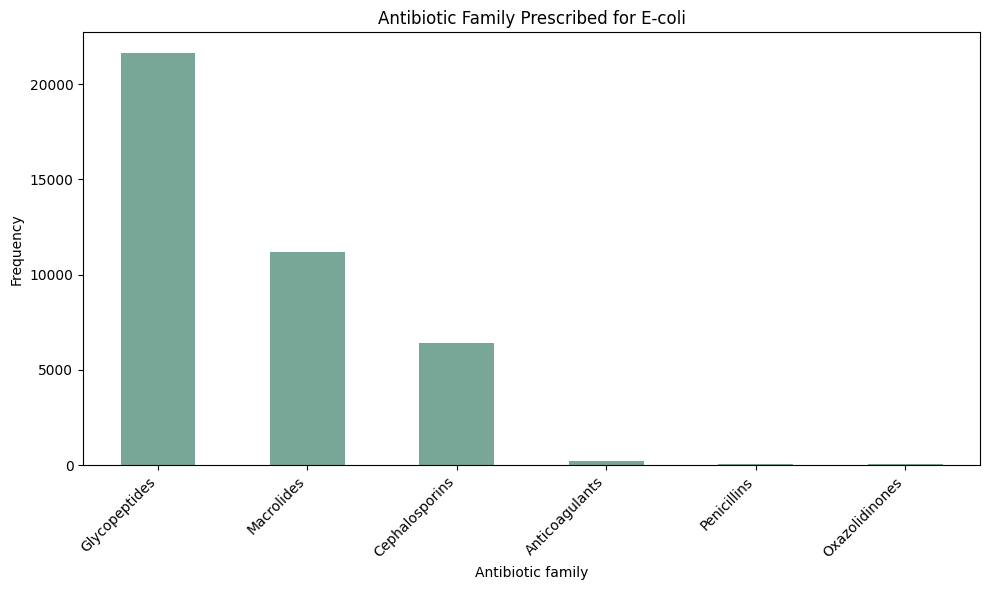

In [ ]:
ECOLI_df = data[data['Bacteria'] == 'Escherichia coli']
bacteria_counts = ECOLI_df['Antibiotic_Family'].value_counts()
plt.figure(figsize=(10, 6))
bacteria_counts.plot(kind='bar', color='#78a798')
plt.title('Antibiotic Family Prescribed for E-coli')
plt.xlabel('Antibiotic family')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

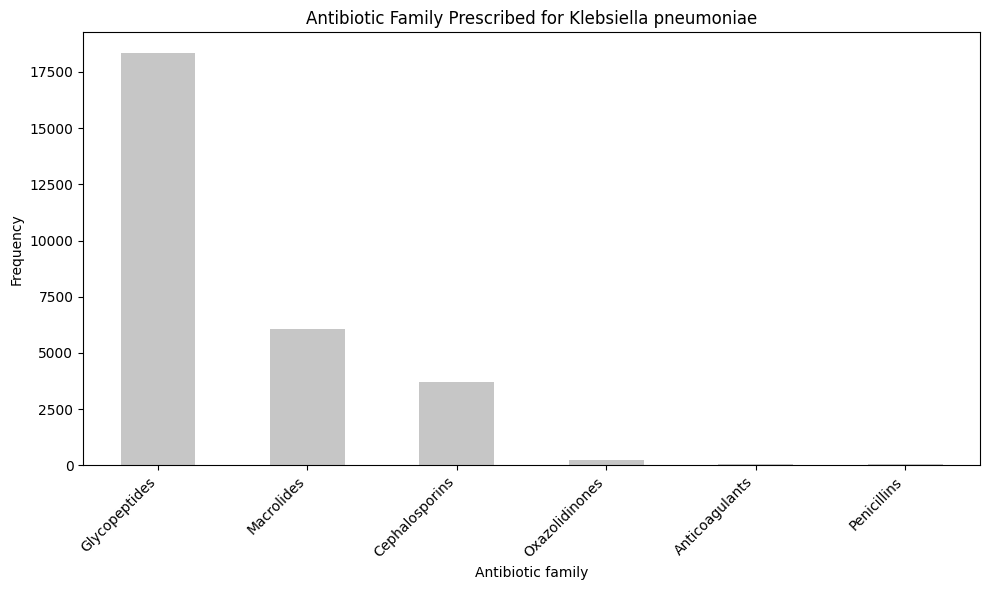

In [ ]:
klebsi_df = data[data['Bacteria'] == 'Klebsiella pneumoniae']
bacteria_counts = klebsi_df['Antibiotic_Family'].value_counts()
plt.figure(figsize=(10, 6))
bacteria_counts.plot(kind='bar', color='#c6c6c6')
plt.title('Antibiotic Family Prescribed for Klebsiella pneumoniae')
plt.xlabel('Antibiotic family')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


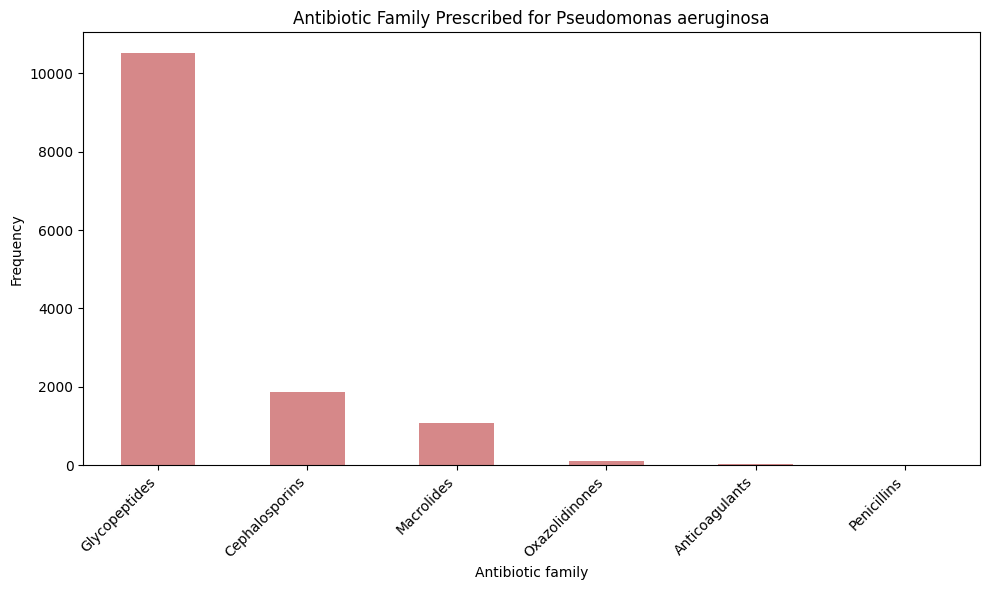

In [ ]:
ps_df = data[data['Bacteria'] == 'Pseudomonas aeruginosa']
bacteria_counts = ps_df['Antibiotic_Family'].value_counts()
plt.figure(figsize=(10, 6))
bacteria_counts.plot(kind='bar', color='#d68889')
plt.title('Antibiotic Family Prescribed for Pseudomonas aeruginosa')
plt.xlabel('Antibiotic family')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

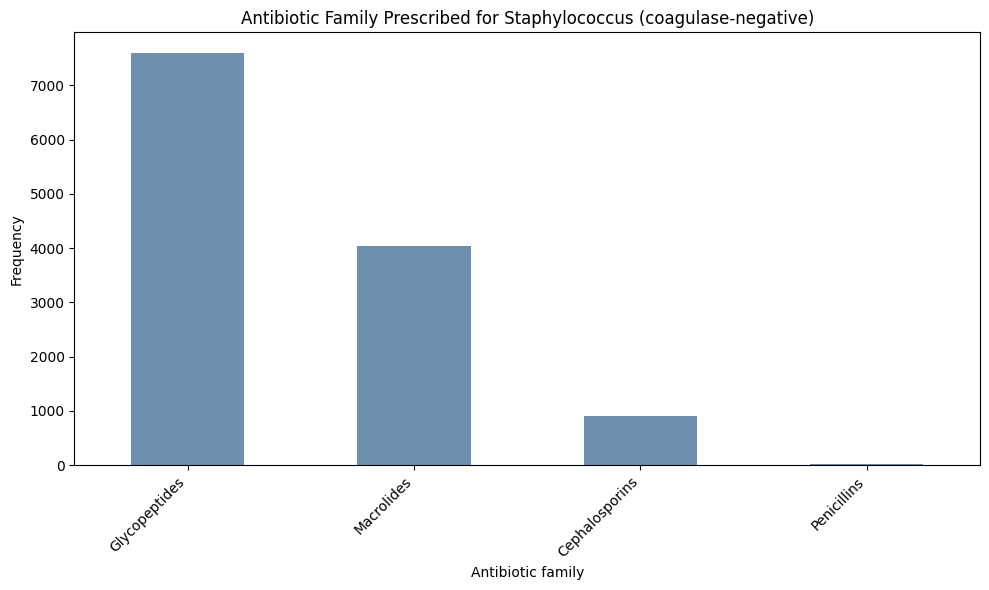

In [ ]:
ps_df = data[data['Bacteria'] == 'Staphylococcus (coagulase-negative)']
bacteria_counts = ps_df['Antibiotic_Family'].value_counts()
plt.figure(figsize=(10, 6))
bacteria_counts.plot(kind='bar', color='#6F8FAF')
plt.title('Antibiotic Family Prescribed for Staphylococcus (coagulase-negative)')
plt.xlabel('Antibiotic family')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

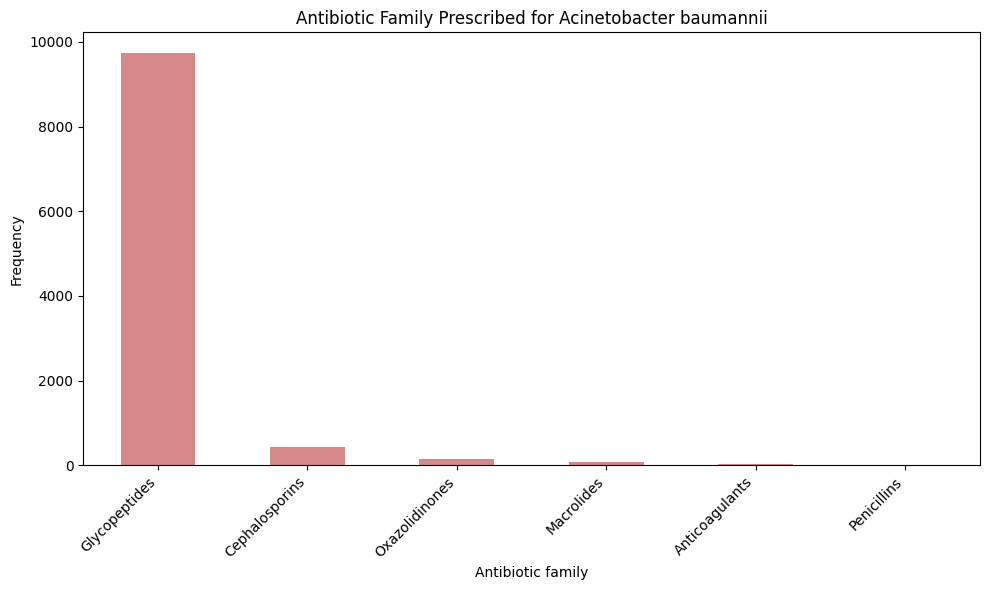

In [ ]:
ps_df = data[data['Bacteria'] == 'Acinetobacter baumannii']
bacteria_counts = ps_df['Antibiotic_Family'].value_counts()
plt.figure(figsize=(10, 6))
bacteria_counts.plot(kind='bar', color='#d68889')
plt.title('Antibiotic Family Prescribed for Acinetobacter baumannii')
plt.xlabel('Antibiotic family')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [6]:
data=data.drop(['End date',"StartDate",'DiagnosisDateTime','PatientID','Hospital','City','AdmissionPeriod','Prescription','TreatmentTime','Antibiotics','InsuranceType'],axis=1)

# **Escherichia coli AdaBoost**


In [ ]:
es_df = data[data['Bacteria'] == 'Escherichia coli']
bacteria_counts_c = es_df['Antibiotic_Family'].value_counts()
print(bacteria_counts_c)

Antibiotic_Family
Glycopeptides     21640
Macrolides        11201
Cephalosporins     6408
Anticoagulants      213
Penicillins          48
Oxazolidinones       45
Name: count, dtype: int64


In [ ]:
# Assuming 'data' is your original DataFrame
data_g = data[data['Bacteria'] == 'Escherichia coli']

df = pd.DataFrame(data_g)
df = df.applymap(str)

values_to_remove = ['Anticoagulants', 'Penicillins', 'Oxazolidinones']
# Drop rows where any column has any of the specified values
df = df[~df.isin(values_to_remove).any(axis=1)]

print(df['Antibiotic_Family'].value_counts())

print(df['SensitivityResult'].value_counts())
# Encode categorical data
for col in df.columns:
    if df[col].dtype == 'object':  # Check if column dtype is 'object' (categorical)
        label_encoder = LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col])

# Separate features and target
X = df.drop(columns=['SensitivityResult', 'Bacteria'])
y = df['SensitivityResult']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define classifier
adaboost = AdaBoostClassifier(n_estimators=100, learning_rate=0.5, random_state=42)

# Perform cross-validation on the training set
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(adaboost, X, y, cv=stratified_kfold)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy: {:.4f}".format(cv_scores.mean()))
print("Standard deviation of scores: {:.4f}".format(cv_scores.std()))

# Fit the model on the full training set
adaboost.fit(X_train, y_train)

# Evaluate the trained model on the test set
test_accuracy = adaboost.score(X_test, y_test)
print("Accuracy on unseen test data:", test_accuracy)

# Make predictions on the test set
test_predictions = adaboost.predict(X_test)

# Calculate confusion matrix
conf_matrix_test = confusion_matrix(y_test, test_predictions)
print("Confusion matrix:\n", conf_matrix_test)

# Calculate sensitivity and specificity
tn_test, fp_test, fn_test, tp_test = conf_matrix_test.ravel()
sensitivity_test = tp_test / (tp_test + fn_test)
specificity_test = tn_test / (tn_test + fp_test)

# Calculate precision, recall, and F1-score based on test set predictions
precision_test = precision_score(y_test, test_predictions)
recall_test = recall_score(y_test, test_predictions)
f1_score_test = f1_score(y_test, test_predictions)

# Calculate AuROC based on test set predictions
test_predictions_proba = adaboost.predict_proba(X_test)[:, 1]
auc_roc_test = roc_auc_score(y_test, test_predictions_proba)

# Print the metrics based on test set predictions
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-score:", f1_score_test)
print("Sensitivity:", sensitivity_test)
print("Specificity:", specificity_test)
print("AuROC:", auc_roc_test)

from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, test_predictions)
print("Matthews Correlation Coefficient (MCC):", mcc)

Antibiotic_Family
Glycopeptides     21640
Macrolides        11201
Cephalosporins     6408
Name: count, dtype: int64
SensitivityResult
S    24409
R    14840
Name: count, dtype: int64
Cross-validation scores: [0.87872611 0.87757962 0.87184713 0.88343949 0.87476112]
Mean accuracy: 0.8773
Standard deviation of scores: 0.0039
Accuracy on unseen test data: 0.8757961783439491
Confusion matrix:
 [[2520  448]
 [ 527 4355]]
Precision: 0.9067249635644389
Recall: 0.8920524375256043
F1-score: 0.8993288590604026
Sensitivity: 0.8920524375256043
Specificity: 0.8490566037735849
AuROC: 0.9464452728599808
Matthews Correlation Coefficient (MCC): 0.7374293640109253


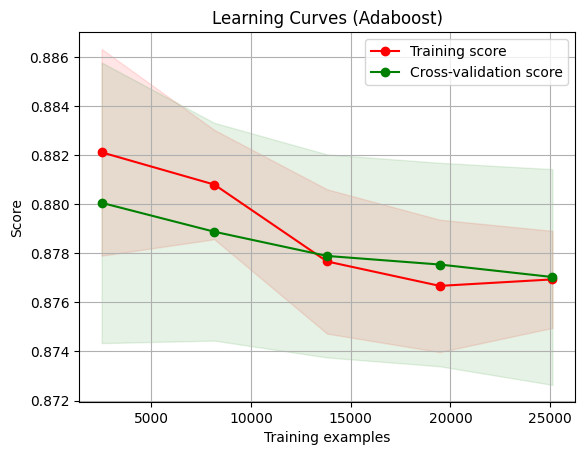

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

# Define a function to plot learning curves
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curves
title = "Learning Curves (Adaboost)"
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
plot_learning_curve(adaboost, title, X_train, y_train, cv=cv, n_jobs=-1)

plt.show()


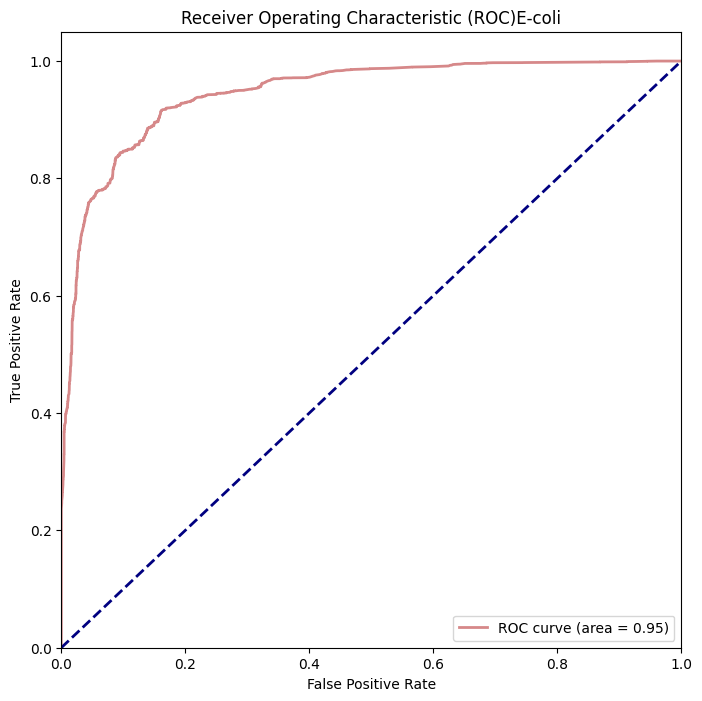

Area Under the Curve (AUC): 0.9453680172018369


In [ ]:
y_train_proba = cross_val_predict(adaboost, X_train, y_train, cv=stratified_kfold, method='predict_proba')[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_train, y_train_proba)
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='#d68889', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)E-coli')
plt.legend(loc="lower right")
plt.show()

# Print AUC
print("Area Under the Curve (AUC):",roc_auc)

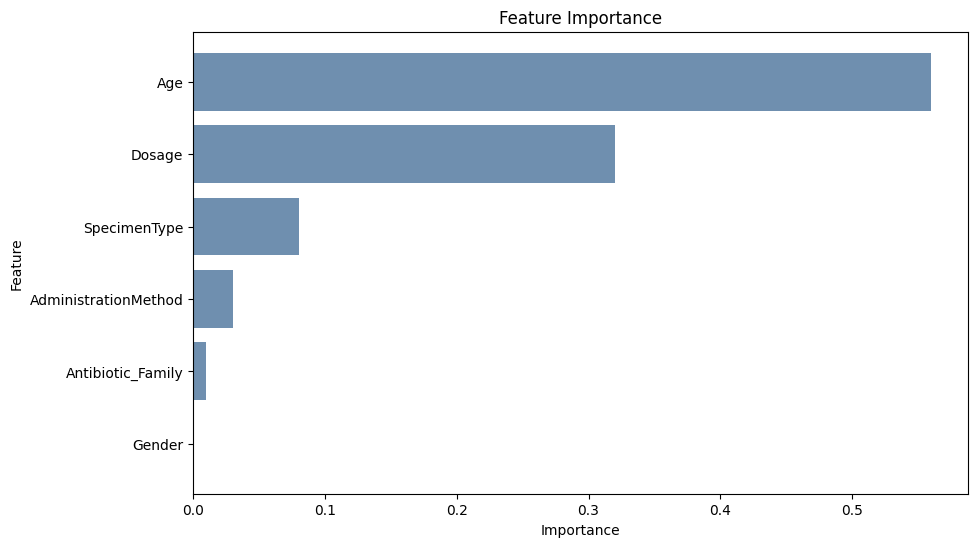

In [ ]:
import matplotlib.pyplot as plt

# Get feature importances from the trained Random Forest model
feature_importances = adaboost.feature_importances_

# Get the names of the features
feature_names = X.columns

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='#6F8FAF')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important features at the top
plt.show()


# **Klebsiella pneumoniae AdaBoost**


In [ ]:
es_df = data[data['Bacteria'] == 'Klebsiella pneumoniae']
bacteria_counts_c = es_df['Antibiotic_Family'].value_counts()
print(bacteria_counts_c)

Antibiotic_Family
Glycopeptides     18347
Macrolides         6042
Cephalosporins     3711
Oxazolidinones      252
Anticoagulants       73
Penicillins          52
Name: count, dtype: int64


In [ ]:
data_g = data[data['Bacteria'] == 'Klebsiella pneumoniae']
df = pd.DataFrame(data_g)
df = df.applymap(str)

values_to_remove = ['Anticoagulants', 'Penicillins']
# Drop rows where any column has any of the specified values
df = df[~df.isin(values_to_remove).any(axis=1)]

print(df['SensitivityResult'].value_counts())
# Encode categorical data
for col in df.columns:
    if df[col].dtype == 'object':  # Check if column dtype is 'object' (categorical)
        label_encoder = LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col])

# Separate features and target
X = df.drop(columns=['SensitivityResult', 'Bacteria'])
y = df['SensitivityResult']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define classifier
adaboost = AdaBoostClassifier(n_estimators=100, learning_rate=0.5, random_state=42)

# Perform cross-validation on the training set
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(adaboost, X, y, cv=stratified_kfold)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy: {:.4f}".format(cv_scores.mean()))
print("Standard deviation of scores: {:.4f}".format(cv_scores.std()))

# Fit the model on the full training set
adaboost.fit(X_train, y_train)

# Evaluate the trained model on the test set
test_accuracy = adaboost.score(X_test, y_test)
print("Accuracy on unseen test data:", test_accuracy)

# Make predictions on the test set
test_predictions = adaboost.predict(X_test)

# Calculate confusion matrix
conf_matrix_test = confusion_matrix(y_test, test_predictions)
print("Confusion matrix:\n", conf_matrix_test)

# Calculate sensitivity and specificity
tn_test, fp_test, fn_test, tp_test = conf_matrix_test.ravel()
sensitivity_test = tp_test / (tp_test + fn_test)
specificity_test = tn_test / (tn_test + fp_test)

# Calculate precision, recall, and F1-score based on test set predictions
precision_test = precision_score(y_test, test_predictions)
recall_test = recall_score(y_test, test_predictions)
f1_score_test = f1_score(y_test, test_predictions)

# Calculate AuROC based on test set predictions
test_predictions_proba = adaboost.predict_proba(X_test)[:, 1]
auc_roc_test = roc_auc_score(y_test, test_predictions_proba)

# Print the metrics based on test set predictions
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-score:", f1_score_test)
print("Sensitivity:", sensitivity_test)
print("Specificity:", specificity_test)
print("AuROC:", auc_roc_test)

from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, test_predictions)
print("Matthews Correlation Coefficient (MCC):", mcc)

SensitivityResult
S    23010
R     5342
Name: count, dtype: int64
Cross-validation scores: [0.88344207 0.8880268  0.87636684 0.88253968 0.88924162]
Mean accuracy: 0.8839
Standard deviation of scores: 0.0046
Accuracy on unseen test data: 0.8846764239111268
Confusion matrix:
 [[ 530  539]
 [ 115 4487]]
Precision: 0.8927576601671309
Recall: 0.9750108648413733
F1-score: 0.9320731200664728
Sensitivity: 0.9750108648413733
Specificity: 0.49579045837231056
AuROC: 0.9243266339237546
Matthews Correlation Coefficient (MCC): 0.5799742809148525


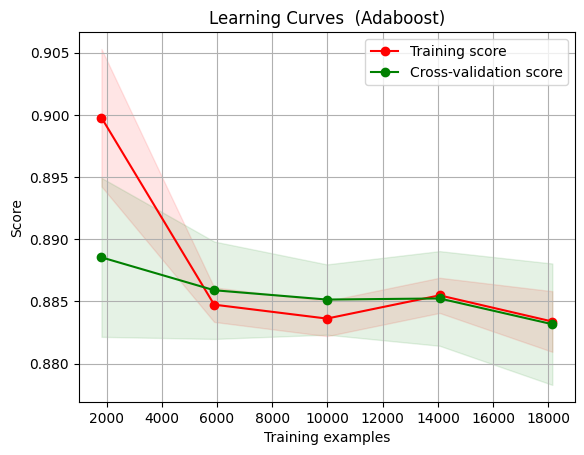

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

# Define a function to plot learning curves
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curves
title = "Learning Curves  (Adaboost)"
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
plot_learning_curve(adaboost, title, X_train, y_train, cv=cv, n_jobs=-1)

plt.show()


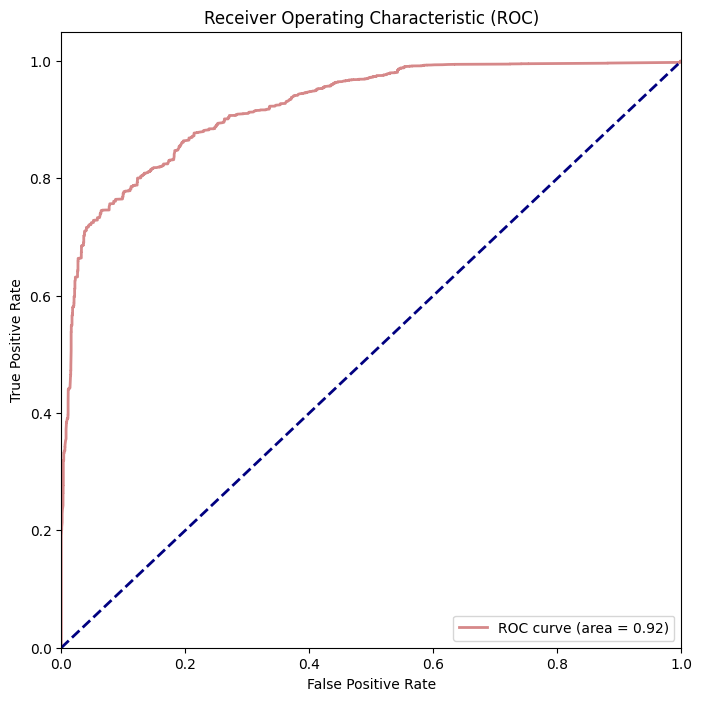

Area Under the Curve (AUC): 0.9224055112232057


In [ ]:
y_train_proba = cross_val_predict(adaboost, X_train, y_train, cv=stratified_kfold, method='predict_proba')[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_train, y_train_proba)
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='#d68889', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Print AUC
print("Area Under the Curve (AUC):",roc_auc)

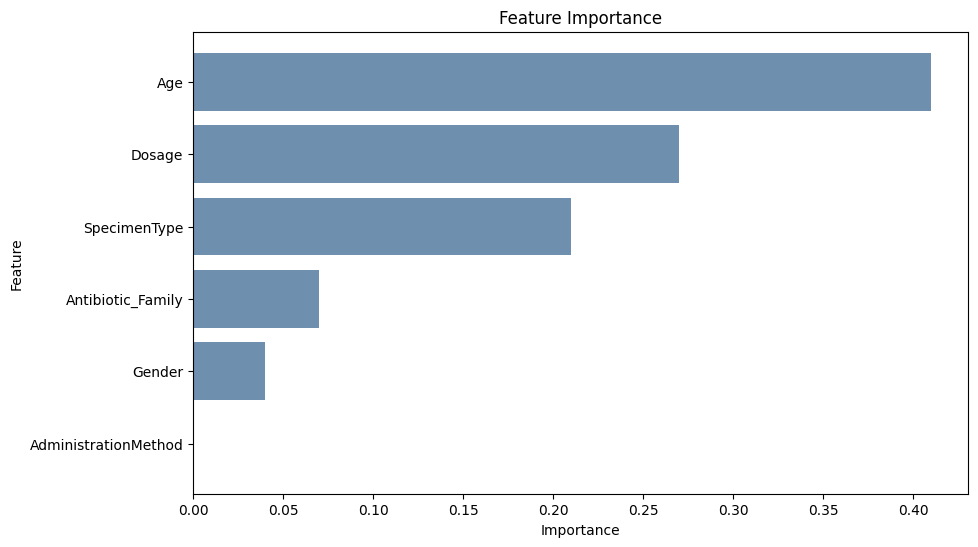

In [ ]:
import matplotlib.pyplot as plt

# Get feature importances from the trained Random Forest model
feature_importances = adaboost.feature_importances_

# Get the names of the features
feature_names = X.columns

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='#6F8FAF')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important features at the top
plt.show()


# **Pseudomonas aeruginosa AdaBoost**


In [ ]:
es_df = data[data['Bacteria'] == 'Pseudomonas aeruginosa']
bacteria_counts_c = es_df['Antibiotic_Family'].value_counts()
print(bacteria_counts_c)

Antibiotic_Family
Glycopeptides     10516
Cephalosporins     1872
Macrolides         1085
Oxazolidinones      114
Anticoagulants       27
Penicillins          12
Name: count, dtype: int64


In [ ]:
data_g = data[data['Bacteria'] == 'Pseudomonas aeruginosa']
df = pd.DataFrame(data_g)
df = df.applymap(str)

values_to_remove = ['Anticoagulants', 'Penicillins','Oxazolidinones']
# Drop rows where any column has any of the specified values
df = df[~df.isin(values_to_remove).any(axis=1)]

print(df['SensitivityResult'].value_counts())
# Encode categorical data
for col in df.columns:
    if df[col].dtype == 'object':  # Check if column dtype is 'object' (categorical)
        label_encoder = LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col])

# Separate features and target
X = df.drop(columns=['SensitivityResult', 'Bacteria'])
y = df['SensitivityResult']



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define classifier
adaboost = AdaBoostClassifier(n_estimators=100, learning_rate=0.5, random_state=42)

# Perform cross-validation on the training set
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(adaboost, X, y, cv=stratified_kfold)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy: {:.4f}".format(cv_scores.mean()))
print("Standard deviation of scores: {:.4f}".format(cv_scores.std()))

# Fit the model on the full training set
adaboost.fit(X_train, y_train)

# Evaluate the trained model on the test set
test_accuracy = adaboost.score(X_test, y_test)
print("Accuracy on unseen test data:", test_accuracy)

# Make predictions on the test set
test_predictions = adaboost.predict(X_test)

# Calculate confusion matrix
conf_matrix_test = confusion_matrix(y_test, test_predictions)
print("Confusion matrix:\n", conf_matrix_test)

# Calculate sensitivity and specificity
tn_test, fp_test, fn_test, tp_test = conf_matrix_test.ravel()
sensitivity_test = tp_test / (tp_test + fn_test)
specificity_test = tn_test / (tn_test + fp_test)

# Calculate precision, recall, and F1-score based on test set predictions
precision_test = precision_score(y_test, test_predictions)
recall_test = recall_score(y_test, test_predictions)
f1_score_test = f1_score(y_test, test_predictions)

# Calculate AuROC based on test set predictions
test_predictions_proba = adaboost.predict_proba(X_test)[:, 1]
auc_roc_test = roc_auc_score(y_test, test_predictions_proba)

# Print the metrics based on test set predictions
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-score:", f1_score_test)
print("Sensitivity:", sensitivity_test)
print("Specificity:", specificity_test)
print("AuROC:", auc_roc_test)

from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, test_predictions)
print("Matthews Correlation Coefficient (MCC):", mcc)

SensitivityResult
S    11082
R     2391
Name: count, dtype: int64
Cross-validation scores: [0.89239332 0.89907236 0.89128015 0.89309577 0.89012621]
Mean accuracy: 0.8932
Standard deviation of scores: 0.0031
Accuracy on unseen test data: 0.887569573283859
Confusion matrix:
 [[ 204  274]
 [  29 2188]]
Precision: 0.8887083671811535
Recall: 0.9869192602616148
F1-score: 0.9352425731994016
Sensitivity: 0.9869192602616148
Specificity: 0.42677824267782427
AuROC: 0.8940584641690399
Matthews Correlation Coefficient (MCC): 0.562286568572699


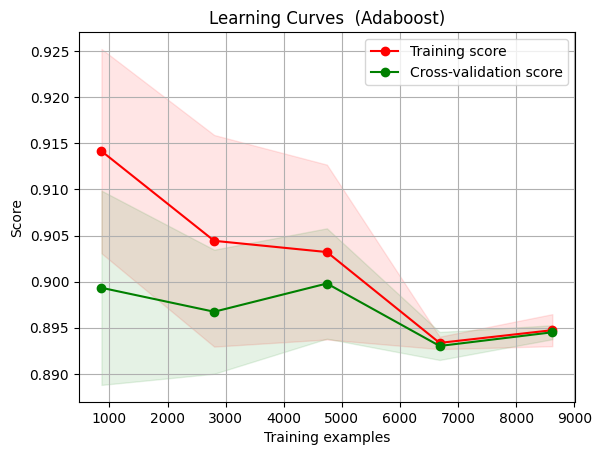

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

# Define a function to plot learning curves
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curves
title = "Learning Curves  (Adaboost)"
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
plot_learning_curve(adaboost, title, X_train, y_train, cv=cv, n_jobs=-1)

plt.show()


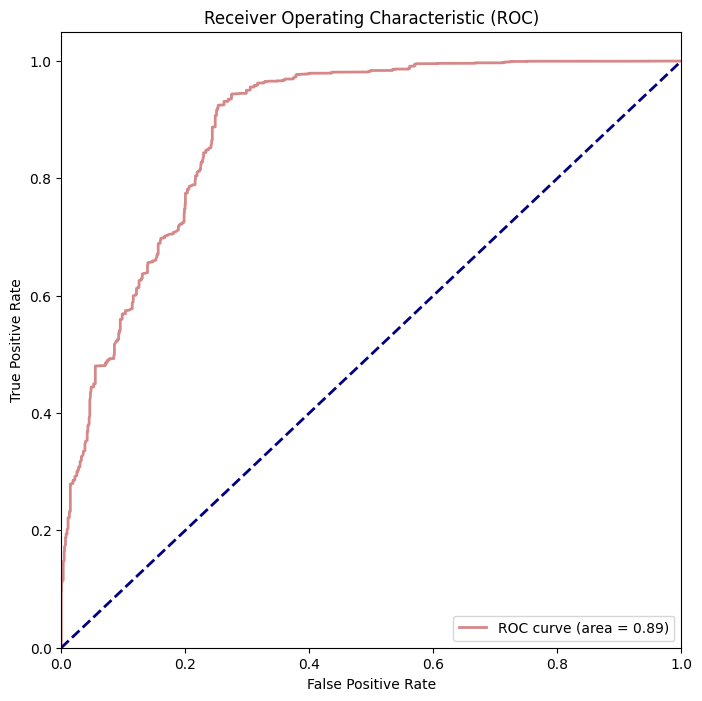

Area Under the Curve (AUC): 0.886349255207269


In [ ]:
y_train_proba = cross_val_predict(adaboost, X_train, y_train, cv=stratified_kfold, method='predict_proba')[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_train, y_train_proba)
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='#d68889', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Print AUC
print("Area Under the Curve (AUC):",roc_auc)

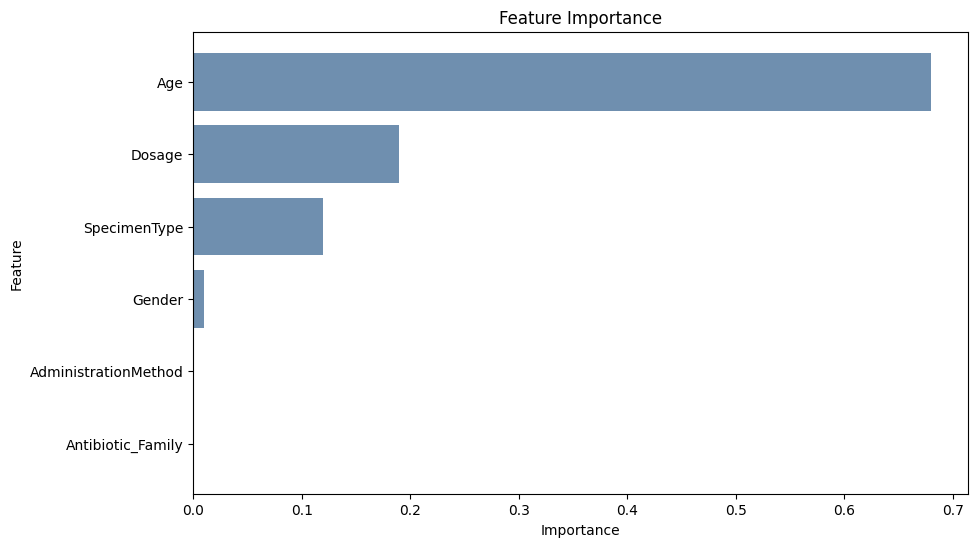

In [ ]:
import matplotlib.pyplot as plt

# Get feature importances from the trained Random Forest model
feature_importances = adaboost.feature_importances_

# Get the names of the features
feature_names = X.columns

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='#6F8FAF')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important features at the top
plt.show()


# **Staphylococcus (coagulase-negative)**

In [ ]:
es_df = data[data['Bacteria'] == 'Staphylococcus (coagulase-negative)']
bacteria_counts_c = es_df['Antibiotic_Family'].value_counts()
print(bacteria_counts_c)

Antibiotic_Family
Glycopeptides     7596
Macrolides        4045
Cephalosporins     907
Penicillins         16
Name: count, dtype: int64


In [ ]:
data_g = data[data['Bacteria'] == 'Staphylococcus (coagulase-negative)']
df = pd.DataFrame(data_g)
df = df.applymap(str)

values_to_remove = ['Penicillins']
# Drop rows where any column has any of the specified values
df = df[~df.isin(values_to_remove).any(axis=1)]


print(df['SensitivityResult'].value_counts())
# Encode categorical data
for col in df.columns:
    if df[col].dtype == 'object':  # Check if column dtype is 'object' (categorical)
        label_encoder = LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col])

# Separate features and target
X = df.drop(columns=['SensitivityResult', 'Bacteria'])
y = df['SensitivityResult']



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define classifier
adaboost = AdaBoostClassifier(n_estimators=100, learning_rate=0.5, random_state=42)

# Perform cross-validation on the training set
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(adaboost, X, y, cv=stratified_kfold)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy: {:.4f}".format(cv_scores.mean()))
print("Standard deviation of scores: {:.4f}".format(cv_scores.std()))

# Fit the model on the full training set
adaboost.fit(X_train, y_train)

# Evaluate the trained model on the test set
test_accuracy = adaboost.score(X_test, y_test)
print("Accuracy on unseen test data:", test_accuracy)

# Make predictions on the test set
test_predictions = adaboost.predict(X_test)

# Calculate confusion matrix
conf_matrix_test = confusion_matrix(y_test, test_predictions)
print("Confusion matrix:\n", conf_matrix_test)

# Calculate sensitivity and specificity
tn_test, fp_test, fn_test, tp_test = conf_matrix_test.ravel()
sensitivity_test = tp_test / (tp_test + fn_test)
specificity_test = tn_test / (tn_test + fp_test)

# Calculate precision, recall, and F1-score based on test set predictions
precision_test = precision_score(y_test, test_predictions)
recall_test = recall_score(y_test, test_predictions)
f1_score_test = f1_score(y_test, test_predictions)

# Calculate AuROC based on test set predictions
test_predictions_proba = adaboost.predict_proba(X_test)[:, 1]
auc_roc_test = roc_auc_score(y_test, test_predictions_proba)

# Print the metrics based on test set predictions
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-score:", f1_score_test)
print("Sensitivity:", sensitivity_test)
print("Specificity:", specificity_test)
print("AuROC:", auc_roc_test)

from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, test_predictions)
print("Matthews Correlation Coefficient (MCC):", mcc)

SensitivityResult
R    8706
S    3842
Name: count, dtype: int64
Cross-validation scores: [0.90916335 0.90916335 0.91075697 0.90713432 0.89956158]
Mean accuracy: 0.9072
Standard deviation of scores: 0.0040
Accuracy on unseen test data: 0.902788844621514
Confusion matrix:
 [[1668   73]
 [ 171  598]]
Precision: 0.8912071535022354
Recall: 0.7776332899869961
F1-score: 0.8305555555555556
Sensitivity: 0.7776332899869961
Specificity: 0.95807007466973
AuROC: 0.9691204029790212
Matthews Correlation Coefficient (MCC): 0.7663253160650842


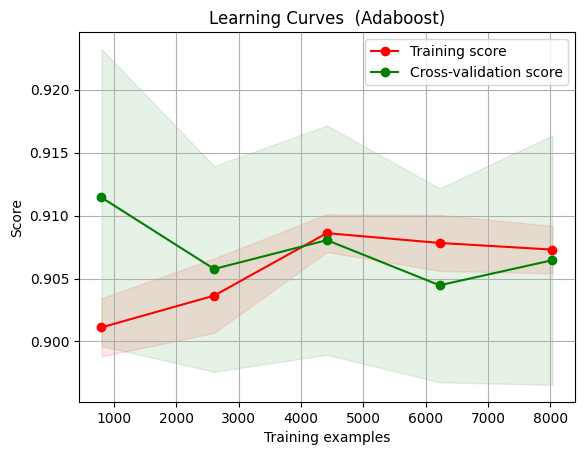

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curve
title = "Learning Curves  (Adaboost)"
plot_learning_curve(adaboost, title, X_train, y_train, cv=stratified_kfold, n_jobs=-1)

plt.show()


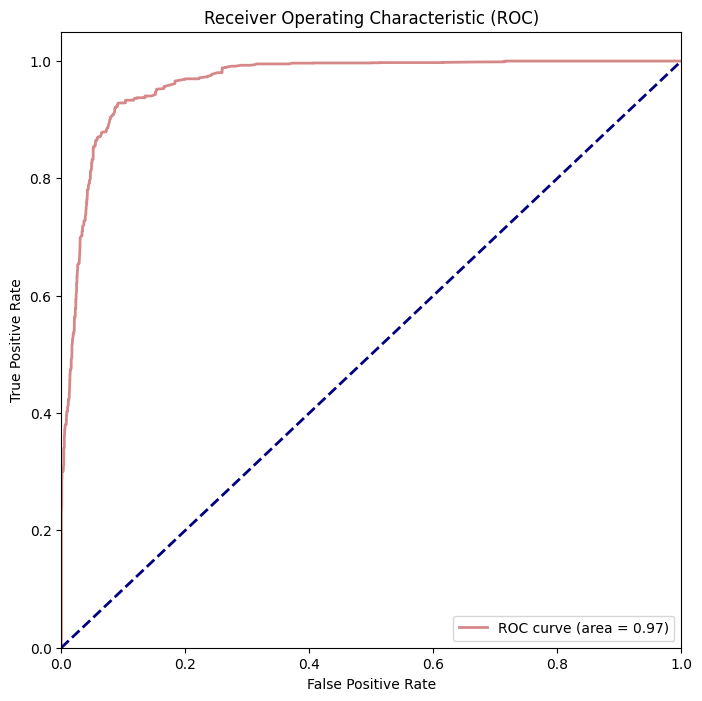

Area Under the Curve (AUC): 0.965571967503362


In [ ]:
y_train_proba = cross_val_predict(adaboost, X_train, y_train, cv=stratified_kfold, method='predict_proba')[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_train, y_train_proba)
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='#d68889', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Print AUC
print("Area Under the Curve (AUC):",roc_auc)

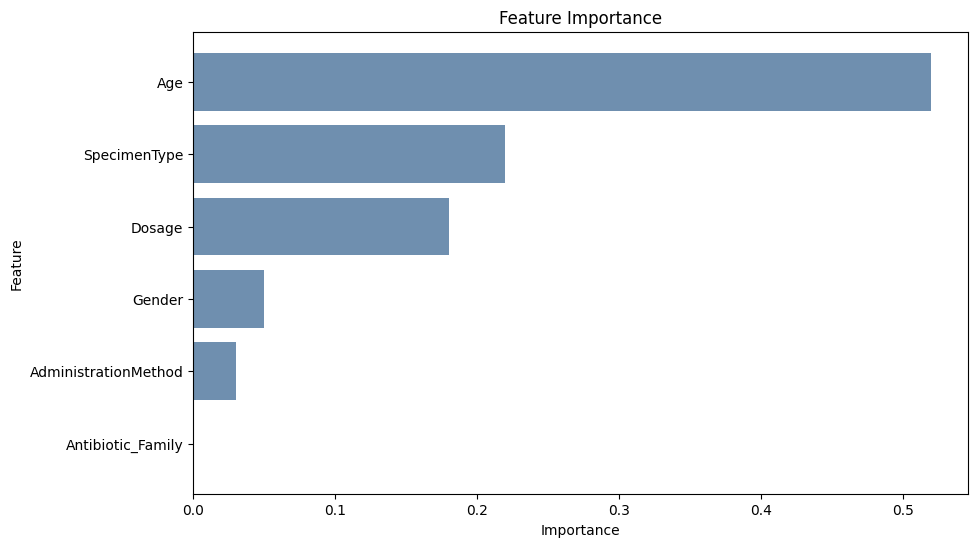

In [ ]:
import matplotlib.pyplot as plt

# Get feature importances from the trained Random Forest model
feature_importances = adaboost.feature_importances_

# Get the names of the features
feature_names = X.columns

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='#6F8FAF')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important features at the top
plt.show()


#**Acinetobacter baumannii**

In [ ]:
es_df = data[data['Bacteria'] == 'Acinetobacter baumannii']
bacteria_counts_c = es_df['Antibiotic_Family'].value_counts()
print(bacteria_counts_c)

Antibiotic_Family
Glycopeptides     9739
Cephalosporins     424
Oxazolidinones     144
Macrolides          66
Anticoagulants      39
Penicillins         17
Name: count, dtype: int64


In [ ]:
data_g = data[data['Bacteria'] == 'Acinetobacter baumannii']
df = pd.DataFrame(data_g)
df = df.applymap(str)

values_to_remove = ['Macrolides','Anticoagulants','Penicillins']
# Drop rows where any column has any of the specified values
df = df[~df.isin(values_to_remove).any(axis=1)]

print(df['SensitivityResult'].value_counts())
# Encode categorical data
for col in df.columns:
    if df[col].dtype == 'object':  # Check if column dtype is 'object' (categorical)
        label_encoder = LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col])

# Separate features and target
X = df.drop(columns=['SensitivityResult', 'Bacteria'])
y = df['SensitivityResult']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define classifier
adaboost = AdaBoostClassifier(n_estimators=100, learning_rate=0.5, random_state=42)

# Perform cross-validation on the training set
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(adaboost, X, y, cv=stratified_kfold)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy: {:.4f}".format(cv_scores.mean()))
print("Standard deviation of scores: {:.4f}".format(cv_scores.std()))

# Fit the model on the full training set
adaboost.fit(X_train, y_train)

# Evaluate the trained model on the test set
test_accuracy = adaboost.score(X_test, y_test)
print("Accuracy on unseen test data:", test_accuracy)

# Make predictions on the test set
test_predictions = adaboost.predict(X_test)

# Calculate confusion matrix
conf_matrix_test = confusion_matrix(y_test, test_predictions)
print("Confusion matrix:\n", conf_matrix_test)

# Calculate sensitivity and specificity
tn_test, fp_test, fn_test, tp_test = conf_matrix_test.ravel()
sensitivity_test = tp_test / (tp_test + fn_test)
specificity_test = tn_test / (tn_test + fp_test)

# Calculate precision, recall, and F1-score based on test set predictions
precision_test = precision_score(y_test, test_predictions)
recall_test = recall_score(y_test, test_predictions)
f1_score_test = f1_score(y_test, test_predictions)

# Calculate AuROC based on test set predictions
test_predictions_proba = adaboost.predict_proba(X_test)[:, 1]
auc_roc_test = roc_auc_score(y_test, test_predictions_proba)

# Print the metrics based on test set predictions
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-score:", f1_score_test)
print("Sensitivity:", sensitivity_test)
print("Specificity:", specificity_test)
print("AuROC:", auc_roc_test)

from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, test_predictions)
print("Matthews Correlation Coefficient (MCC):", mcc)

SensitivityResult
R    9408
S     899
Name: count, dtype: int64
Cross-validation scores: [0.96847721 0.96896217 0.96991752 0.9631247  0.9645803 ]
Mean accuracy: 0.9670
Standard deviation of scores: 0.0027
Accuracy on unseen test data: 0.9641125121241513
Confusion matrix:
 [[1867   15]
 [  59  121]]
Precision: 0.8897058823529411
Recall: 0.6722222222222223
F1-score: 0.7658227848101266
Sensitivity: 0.6722222222222223
Specificity: 0.9920297555791711
AuROC: 0.9773379383634431
Matthews Correlation Coefficient (MCC): 0.7554075527712169


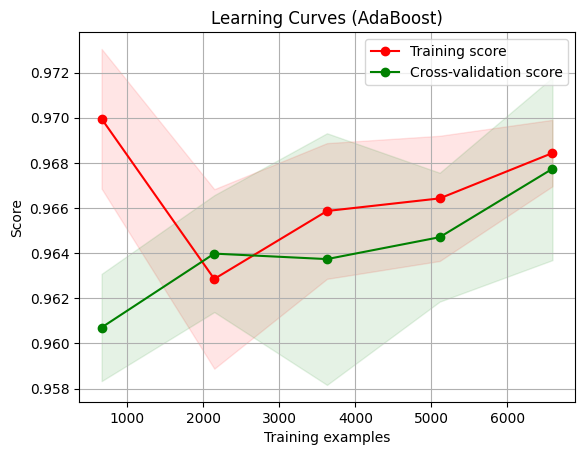

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curve
title = "Learning Curves (AdaBoost)"
plot_learning_curve(adaboost, title, X_train, y_train, cv=stratified_kfold, n_jobs=-1)

plt.show()


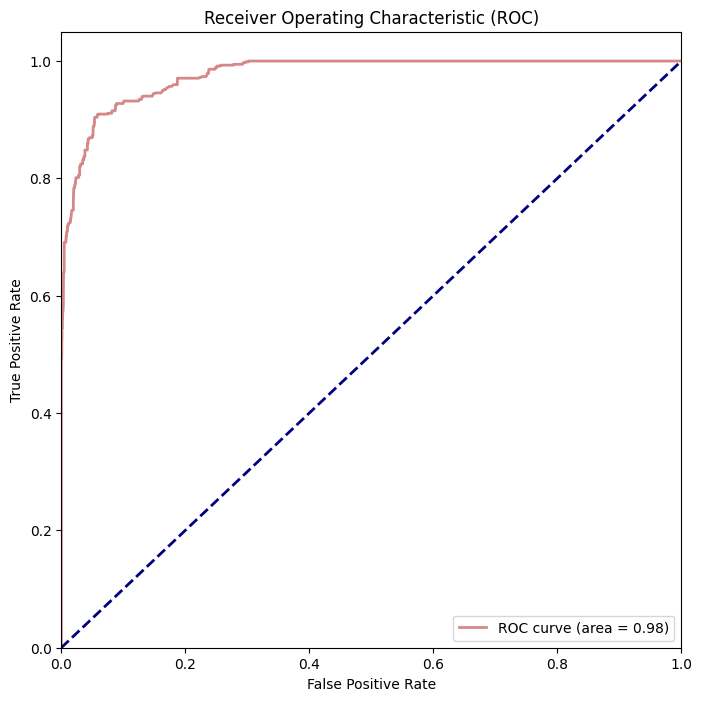

Area Under the Curve (AUC): 0.9773217334288883


In [ ]:
y_train_proba = cross_val_predict(adaboost, X_train, y_train, cv=stratified_kfold, method='predict_proba')[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_train, y_train_proba)
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='#d68889', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Print AUC
print("Area Under the Curve (AUC):",roc_auc)

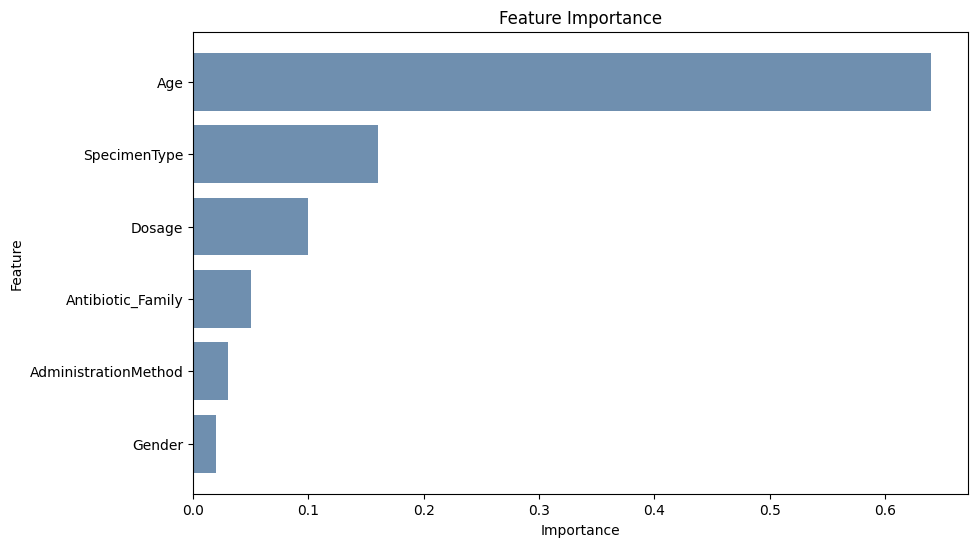

In [ ]:
import matplotlib.pyplot as plt

# Get feature importances from the trained Random Forest model
feature_importances = adaboost.feature_importances_

# Get the names of the features
feature_names = X.columns

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='#6F8FAF')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important features at the top
plt.show()


# **Escherichia coli and Antibiotic Family**

In [8]:
kly=data[data['Bacteria']=='Escherichia coli']
kly.Antibiotic_Family.value_counts()

Antibiotic_Family
Glycopeptides     21640
Macrolides        11201
Cephalosporins     6408
Anticoagulants      213
Penicillins          48
Oxazolidinones       45
Name: count, dtype: int64

## **Escherichia coli and Glycopeptides**

In [ ]:
data_g = data[(data['Bacteria'] == 'Escherichia coli') & (data['Antibiotic_Family'] == 'Glycopeptides')]
df = pd.DataFrame(data_g)
df = df.applymap(str)


print(df['SensitivityResult'].value_counts())
# Encode categorical data
for col in df.columns:
    if df[col].dtype == 'object':  # Check if column dtype is 'object' (categorical)
        label_encoder = LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col])

# Separate features and target
X = df.drop(columns=['SensitivityResult','Bacteria','Antibiotic_Family'])
y = df['SensitivityResult']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define classifier
adaboost = AdaBoostClassifier(n_estimators=100, learning_rate=0.5, random_state=42)

# Perform cross-validation on the training set
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(adaboost, X, y, cv=stratified_kfold)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy: {:.4f}".format(cv_scores.mean()))
print("Standard deviation of scores: {:.4f}".format(cv_scores.std()))

# Fit the model on the full training set
adaboost.fit(X_train, y_train)

# Evaluate the trained model on the test set
test_accuracy = adaboost.score(X_test, y_test)
print("Accuracy on unseen test data:", test_accuracy)

# Make predictions on the test set
test_predictions = adaboost.predict(X_test)

# Calculate confusion matrix
conf_matrix_test = confusion_matrix(y_test, test_predictions)
print("Confusion matrix:\n", conf_matrix_test)

# Calculate sensitivity and specificity
tn_test, fp_test, fn_test, tp_test = conf_matrix_test.ravel()
sensitivity_test = tp_test / (tp_test + fn_test)
specificity_test = tn_test / (tn_test + fp_test)

# Calculate precision, recall, and F1-score based on test set predictions
precision_test = precision_score(y_test, test_predictions)
recall_test = recall_score(y_test, test_predictions)
f1_score_test = f1_score(y_test, test_predictions)

# Calculate AuROC based on test set predictions
test_predictions_proba = adaboost.predict_proba(X_test)[:, 1]
auc_roc_test = roc_auc_score(y_test, test_predictions_proba)

# Print the metrics based on test set predictions
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-score:", f1_score_test)
print("Sensitivity:", sensitivity_test)
print("Specificity:", specificity_test)
print("AuROC:", auc_roc_test)

from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, test_predictions)
print("Matthews Correlation Coefficient (MCC):", mcc)

SensitivityResult
S    17858
R     3782
Name: count, dtype: int64
Cross-validation scores: [0.91543438 0.91890018 0.90873383 0.91173752 0.92467652]
Mean accuracy: 0.9159
Standard deviation of scores: 0.0056
Accuracy on unseen test data: 0.9184380776340111
Confusion matrix:
 [[ 535  221]
 [ 132 3440]]
Precision: 0.9396339797869434
Recall: 0.9630459126539753
F1-score: 0.9511959076455135
Sensitivity: 0.9630459126539753
Specificity: 0.7076719576719577
AuROC: 0.94490529663402
Matthews Correlation Coefficient (MCC): 0.7053322134776381


## **Escherichia coli and Macrolides**

In [7]:
data_g = data[(data['Bacteria'] == 'Escherichia coli') & (data['Antibiotic_Family'] == 'Macrolides')]
df = pd.DataFrame(data_g)
df = df.applymap(str)


print(df['SensitivityResult'].value_counts())
# Encode categorical data
for col in df.columns:
    if df[col].dtype == 'object':  # Check if column dtype is 'object' (categorical)
        label_encoder = LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col])

# Separate features and target
X = df.drop(columns=['SensitivityResult','Bacteria','Antibiotic_Family'])
y = df['SensitivityResult']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define classifier
adaboost = AdaBoostClassifier(n_estimators=100, learning_rate=0.5, random_state=42)

# Perform cross-validation on the training set
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(adaboost, X, y, cv=stratified_kfold)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy: {:.4f}".format(cv_scores.mean()))
print("Standard deviation of scores: {:.4f}".format(cv_scores.std()))

# Fit the model on the full training set
adaboost.fit(X_train, y_train)

# Evaluate the trained model on the test set
test_accuracy = adaboost.score(X_test, y_test)
print("Accuracy on unseen test data:", test_accuracy)

# Make predictions on the test set
test_predictions = adaboost.predict(X_test)

# Calculate confusion matrix
conf_matrix_test = confusion_matrix(y_test, test_predictions)
print("Confusion matrix:\n", conf_matrix_test)

# Calculate sensitivity and specificity
tn_test, fp_test, fn_test, tp_test = conf_matrix_test.ravel()
sensitivity_test = tp_test / (tp_test + fn_test)
specificity_test = tn_test / (tn_test + fp_test)

# Calculate precision, recall, and F1-score based on test set predictions
precision_test = precision_score(y_test, test_predictions)
recall_test = recall_score(y_test, test_predictions)
f1_score_test = f1_score(y_test, test_predictions)

# Calculate AuROC based on test set predictions
test_predictions_proba = adaboost.predict_proba(X_test)[:, 1]
auc_roc_test = roc_auc_score(y_test, test_predictions_proba)

# Print the metrics based on test set predictions
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-score:", f1_score_test)
print("Sensitivity:", sensitivity_test)
print("Specificity:", specificity_test)
print("AuROC:", auc_roc_test)

from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, test_predictions)
print("Matthews Correlation Coefficient (MCC):", mcc)

SensitivityResult
R    9181
S    2020
Name: count, dtype: int64
Cross-validation scores: [0.8768407  0.90491071 0.89330357 0.88973214 0.90267857]
Mean accuracy: 0.8935
Standard deviation of scores: 0.0101
Accuracy on unseen test data: 0.8888888888888888
Confusion matrix:
 [[1803   34]
 [ 215  189]]
Precision: 0.8475336322869955
Recall: 0.46782178217821785
F1-score: 0.6028708133971292
Sensitivity: 0.46782178217821785
Specificity: 0.9814915623298857
AuROC: 0.9334236567369312
Matthews Correlation Coefficient (MCC): 0.5770076425262498


## **Escherichia coli and Cephalosporins**

In [9]:
data_g = data[(data['Bacteria'] == 'Escherichia coli') & (data['Antibiotic_Family'] == 'Cephalosporins')]
df = pd.DataFrame(data_g)
df = df.applymap(str)


print(df['SensitivityResult'].value_counts())
# Encode categorical data
for col in df.columns:
    if df[col].dtype == 'object':  # Check if column dtype is 'object' (categorical)
        label_encoder = LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col])

# Separate features and target
X = df.drop(columns=['SensitivityResult','Bacteria','Antibiotic_Family'])
y = df['SensitivityResult']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define classifier
adaboost = AdaBoostClassifier(n_estimators=100, learning_rate=0.5, random_state=42)

# Perform cross-validation on the training set
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(adaboost, X, y, cv=stratified_kfold)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy: {:.4f}".format(cv_scores.mean()))
print("Standard deviation of scores: {:.4f}".format(cv_scores.std()))

# Fit the model on the full training set
adaboost.fit(X_train, y_train)

# Evaluate the trained model on the test set
test_accuracy = adaboost.score(X_test, y_test)
print("Accuracy on unseen test data:", test_accuracy)

# Make predictions on the test set
test_predictions = adaboost.predict(X_test)

# Calculate confusion matrix
conf_matrix_test = confusion_matrix(y_test, test_predictions)
print("Confusion matrix:\n", conf_matrix_test)

# Calculate sensitivity and specificity
tn_test, fp_test, fn_test, tp_test = conf_matrix_test.ravel()
sensitivity_test = tp_test / (tp_test + fn_test)
specificity_test = tn_test / (tn_test + fp_test)

# Calculate precision, recall, and F1-score based on test set predictions
precision_test = precision_score(y_test, test_predictions)
recall_test = recall_score(y_test, test_predictions)
f1_score_test = f1_score(y_test, test_predictions)

# Calculate AuROC based on test set predictions
test_predictions_proba = adaboost.predict_proba(X_test)[:, 1]
auc_roc_test = roc_auc_score(y_test, test_predictions_proba)

# Print the metrics based on test set predictions
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-score:", f1_score_test)
print("Sensitivity:", sensitivity_test)
print("Specificity:", specificity_test)
print("AuROC:", auc_roc_test)

from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, test_predictions)
print("Matthews Correlation Coefficient (MCC):", mcc)

SensitivityResult
S    4531
R    1877
Name: count, dtype: int64
Cross-validation scores: [0.88377535 0.88143526 0.91419657 0.86494926 0.90320062]
Mean accuracy: 0.8895
Standard deviation of scores: 0.0173
Accuracy on unseen test data: 0.8970358814352574
Confusion matrix:
 [[283  93]
 [ 39 867]]
Precision: 0.903125
Recall: 0.956953642384106
F1-score: 0.9292604501607716
Sensitivity: 0.956953642384106
Specificity: 0.7526595744680851
AuROC: 0.9722726151895167
Matthews Correlation Coefficient (MCC): 0.7449312008876123


# **Klebsiella pneumoniae and Antibiotic Family**

In [10]:
x=data[data['Bacteria']=='Klebsiella pneumoniae']
x.Antibiotic_Family.value_counts()

Antibiotic_Family
Glycopeptides     18347
Macrolides         6042
Cephalosporins     3711
Oxazolidinones      252
Anticoagulants       73
Penicillins          52
Name: count, dtype: int64

## **Klebsiella pneumoniae and Glycopeptides**

In [ ]:
data_g = data[(data['Bacteria'] == 'Klebsiella pneumoniae') & (data['Antibiotic_Family'] == 'Glycopeptides')]
df = pd.DataFrame(data_g)
df = df.applymap(str)


print(df['SensitivityResult'].value_counts())
# Encode categorical data
for col in df.columns:
    if df[col].dtype == 'object':  # Check if column dtype is 'object' (categorical)
        label_encoder = LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col])

# Separate features and target
X = df.drop(columns=['SensitivityResult','Bacteria','Antibiotic_Family'])
y = df['SensitivityResult']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define classifier
adaboost = AdaBoostClassifier(n_estimators=100, learning_rate=0.5, random_state=42)

# Perform cross-validation on the training set
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(adaboost, X, y, cv=stratified_kfold)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy: {:.4f}".format(cv_scores.mean()))
print("Standard deviation of scores: {:.4f}".format(cv_scores.std()))

# Fit the model on the full training set
adaboost.fit(X_train, y_train)

# Evaluate the trained model on the test set
test_accuracy = adaboost.score(X_test, y_test)
print("Accuracy on unseen test data:", test_accuracy)

# Make predictions on the test set
test_predictions = adaboost.predict(X_test)

# Calculate confusion matrix
conf_matrix_test = confusion_matrix(y_test, test_predictions)
print("Confusion matrix:\n", conf_matrix_test)

# Calculate sensitivity and specificity
tn_test, fp_test, fn_test, tp_test = conf_matrix_test.ravel()
sensitivity_test = tp_test / (tp_test + fn_test)
specificity_test = tn_test / (tn_test + fp_test)

# Calculate precision, recall, and F1-score based on test set predictions
precision_test = precision_score(y_test, test_predictions)
recall_test = recall_score(y_test, test_predictions)
f1_score_test = f1_score(y_test, test_predictions)

# Calculate AuROC based on test set predictions
test_predictions_proba = adaboost.predict_proba(X_test)[:, 1]
auc_roc_test = roc_auc_score(y_test, test_predictions_proba)

# Print the metrics based on test set predictions
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-score:", f1_score_test)
print("Sensitivity:", sensitivity_test)
print("Specificity:", specificity_test)
print("AuROC:", auc_roc_test)

from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, test_predictions)
print("Matthews Correlation Coefficient (MCC):", mcc)

SensitivityResult
S    14254
R     4093
Name: count, dtype: int64
Cross-validation scores: [0.88828338 0.88256131 0.88525484 0.89234124 0.88525484]
Mean accuracy: 0.8867
Standard deviation of scores: 0.0033
Accuracy on unseen test data: 0.8874659400544959
Confusion matrix:
 [[ 493  326]
 [  87 2764]]
Precision: 0.8944983818770227
Recall: 0.9694843914415995
F1-score: 0.9304830836559502
Sensitivity: 0.9694843914415995
Specificity: 0.6019536019536019
AuROC: 0.9480365692221181
Matthews Correlation Coefficient (MCC): 0.6522535254222703


## **Klebsiella pneumoniae and Macrolides**

In [11]:
data_g = data[(data['Bacteria'] == 'Klebsiella pneumoniae') & (data['Antibiotic_Family'] == 'Macrolides')]
df = pd.DataFrame(data_g)
df = df.applymap(str)


print(df['SensitivityResult'].value_counts())
# Encode categorical data
for col in df.columns:
    if df[col].dtype == 'object':  # Check if column dtype is 'object' (categorical)
        label_encoder = LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col])

# Separate features and target
X = df.drop(columns=['SensitivityResult','Bacteria','Antibiotic_Family'])
y = df['SensitivityResult']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define classifier
adaboost = AdaBoostClassifier(n_estimators=100, learning_rate=0.5, random_state=42)

# Perform cross-validation on the training set
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(adaboost, X, y, cv=stratified_kfold)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy: {:.4f}".format(cv_scores.mean()))
print("Standard deviation of scores: {:.4f}".format(cv_scores.std()))

# Fit the model on the full training set
adaboost.fit(X_train, y_train)

# Evaluate the trained model on the test set
test_accuracy = adaboost.score(X_test, y_test)
print("Accuracy on unseen test data:", test_accuracy)

# Make predictions on the test set
test_predictions = adaboost.predict(X_test)

# Calculate confusion matrix
conf_matrix_test = confusion_matrix(y_test, test_predictions)
print("Confusion matrix:\n", conf_matrix_test)

# Calculate sensitivity and specificity
tn_test, fp_test, fn_test, tp_test = conf_matrix_test.ravel()
sensitivity_test = tp_test / (tp_test + fn_test)
specificity_test = tn_test / (tn_test + fp_test)

# Calculate precision, recall, and F1-score based on test set predictions
precision_test = precision_score(y_test, test_predictions)
recall_test = recall_score(y_test, test_predictions)
f1_score_test = f1_score(y_test, test_predictions)

# Calculate AuROC based on test set predictions
test_predictions_proba = adaboost.predict_proba(X_test)[:, 1]
auc_roc_test = roc_auc_score(y_test, test_predictions_proba)

# Print the metrics based on test set predictions
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-score:", f1_score_test)
print("Sensitivity:", sensitivity_test)
print("Specificity:", specificity_test)
print("AuROC:", auc_roc_test)

from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, test_predictions)
print("Matthews Correlation Coefficient (MCC):", mcc)

SensitivityResult
S    5630
R     412
Name: count, dtype: int64
Cross-validation scores: [0.96856907 0.97435897 0.9544702  0.95281457 0.9718543 ]
Mean accuracy: 0.9644
Standard deviation of scores: 0.0090
Accuracy on unseen test data: 0.9660876757650951
Confusion matrix:
 [[  54   28]
 [  13 1114]]
Precision: 0.9754816112084063
Recall: 0.9884649511978705
F1-score: 0.9819303657999119
Sensitivity: 0.9884649511978705
Specificity: 0.6585365853658537
AuROC: 0.9646428030385006
Matthews Correlation Coefficient (MCC): 0.7110558977812014


## **Klebsiella pneumoniae and Cephalosporins**

In [12]:
data_g = data[(data['Bacteria'] == 'Klebsiella pneumoniae') & (data['Antibiotic_Family'] == 'Cephalosporins')]
df = pd.DataFrame(data_g)
df = df.applymap(str)


print(df['SensitivityResult'].value_counts())
# Encode categorical data
for col in df.columns:
    if df[col].dtype == 'object':  # Check if column dtype is 'object' (categorical)
        label_encoder = LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col])

# Separate features and target
X = df.drop(columns=['SensitivityResult','Bacteria','Antibiotic_Family'])
y = df['SensitivityResult']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define classifier
adaboost = AdaBoostClassifier(n_estimators=100, learning_rate=0.5, random_state=42)

# Perform cross-validation on the training set
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(adaboost, X, y, cv=stratified_kfold)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy: {:.4f}".format(cv_scores.mean()))
print("Standard deviation of scores: {:.4f}".format(cv_scores.std()))

# Fit the model on the full training set
adaboost.fit(X_train, y_train)

# Evaluate the trained model on the test set
test_accuracy = adaboost.score(X_test, y_test)
print("Accuracy on unseen test data:", test_accuracy)

# Make predictions on the test set
test_predictions = adaboost.predict(X_test)

# Calculate confusion matrix
conf_matrix_test = confusion_matrix(y_test, test_predictions)
print("Confusion matrix:\n", conf_matrix_test)

# Calculate sensitivity and specificity
tn_test, fp_test, fn_test, tp_test = conf_matrix_test.ravel()
sensitivity_test = tp_test / (tp_test + fn_test)
specificity_test = tn_test / (tn_test + fp_test)

# Calculate precision, recall, and F1-score based on test set predictions
precision_test = precision_score(y_test, test_predictions)
recall_test = recall_score(y_test, test_predictions)
f1_score_test = f1_score(y_test, test_predictions)

# Calculate AuROC based on test set predictions
test_predictions_proba = adaboost.predict_proba(X_test)[:, 1]
auc_roc_test = roc_auc_score(y_test, test_predictions_proba)

# Print the metrics based on test set predictions
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-score:", f1_score_test)
print("Sensitivity:", sensitivity_test)
print("Specificity:", specificity_test)
print("AuROC:", auc_roc_test)

from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, test_predictions)
print("Matthews Correlation Coefficient (MCC):", mcc)

SensitivityResult
S    2878
R     833
Name: count, dtype: int64
Cross-validation scores: [0.93270525 0.93530997 0.93396226 0.92318059 0.93530997]
Mean accuracy: 0.9321
Standard deviation of scores: 0.0046
Accuracy on unseen test data: 0.9313593539703903
Confusion matrix:
 [[136  31]
 [ 20 556]]
Precision: 0.9471890971039182
Recall: 0.9652777777777778
F1-score: 0.9561478933791917
Sensitivity: 0.9652777777777778
Specificity: 0.8143712574850299
AuROC: 0.9481713656021291
Matthews Correlation Coefficient (MCC): 0.7990745029392735


# **Pseudomonas aeruginosa and Antibiotic Family**

In [13]:
x=data[data['Bacteria']=='Pseudomonas aeruginosa']
x.Antibiotic_Family.value_counts()

Antibiotic_Family
Glycopeptides     10516
Cephalosporins     1872
Macrolides         1085
Oxazolidinones      114
Anticoagulants       27
Penicillins          12
Name: count, dtype: int64

## **Pseudomonas aeruginosa and Glycopeptides**

In [14]:
data_g = data[(data['Bacteria'] == 'Pseudomonas aeruginosa') & (data['Antibiotic_Family'] == 'Glycopeptides')]
df = pd.DataFrame(data_g)
df = df.applymap(str)


print(df['SensitivityResult'].value_counts())
# Encode categorical data
for col in df.columns:
    if df[col].dtype == 'object':  # Check if column dtype is 'object' (categorical)
        label_encoder = LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col])

# Separate features and target
X = df.drop(columns=['SensitivityResult','Bacteria','Antibiotic_Family'])
y = df['SensitivityResult']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define classifier
adaboost = AdaBoostClassifier(n_estimators=100, learning_rate=0.5, random_state=42)

# Perform cross-validation on the training set
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(adaboost, X, y, cv=stratified_kfold)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy: {:.4f}".format(cv_scores.mean()))
print("Standard deviation of scores: {:.4f}".format(cv_scores.std()))

# Fit the model on the full training set
adaboost.fit(X_train, y_train)

# Evaluate the trained model on the test set
test_accuracy = adaboost.score(X_test, y_test)
print("Accuracy on unseen test data:", test_accuracy)

# Make predictions on the test set
test_predictions = adaboost.predict(X_test)

# Calculate confusion matrix
conf_matrix_test = confusion_matrix(y_test, test_predictions)
print("Confusion matrix:\n", conf_matrix_test)

# Calculate sensitivity and specificity
tn_test, fp_test, fn_test, tp_test = conf_matrix_test.ravel()
sensitivity_test = tp_test / (tp_test + fn_test)
specificity_test = tn_test / (tn_test + fp_test)

# Calculate precision, recall, and F1-score based on test set predictions
precision_test = precision_score(y_test, test_predictions)
recall_test = recall_score(y_test, test_predictions)
f1_score_test = f1_score(y_test, test_predictions)

# Calculate AuROC based on test set predictions
test_predictions_proba = adaboost.predict_proba(X_test)[:, 1]
auc_roc_test = roc_auc_score(y_test, test_predictions_proba)

# Print the metrics based on test set predictions
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-score:", f1_score_test)
print("Sensitivity:", sensitivity_test)
print("Specificity:", specificity_test)
print("AuROC:", auc_roc_test)

from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, test_predictions)
print("Matthews Correlation Coefficient (MCC):", mcc)

SensitivityResult
S    8682
R    1834
Name: count, dtype: int64
Cross-validation scores: [0.89781369 0.89396101 0.89396101 0.90109368 0.89728959]
Mean accuracy: 0.8968
Standard deviation of scores: 0.0027
Accuracy on unseen test data: 0.9063688212927756
Confusion matrix:
 [[ 175  192]
 [   5 1732]]
Precision: 0.9002079002079002
Recall: 0.9971214738054116
F1-score: 0.9461895656924337
Sensitivity: 0.9971214738054116
Specificity: 0.4768392370572207
AuROC: 0.9058455258918333
Matthews Correlation Coefficient (MCC): 0.6430377912727635


## **Pseudomonas aeruginosa and Cephalosporins**

In [19]:
data_g = data[(data['Bacteria'] == 'Pseudomonas aeruginosa') & (data['Antibiotic_Family'] == 'Cephalosporins')]
df = pd.DataFrame(data_g)
df = df.applymap(str)


print(df['SensitivityResult'].value_counts())
# Encode categorical data
for col in df.columns:
    if df[col].dtype == 'object':  # Check if column dtype is 'object' (categorical)
        label_encoder = LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col])

# Separate features and target
X = df.drop(columns=['SensitivityResult','Bacteria','Antibiotic_Family'])
y = df['SensitivityResult']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define classifier
adaboost = AdaBoostClassifier(n_estimators=100, learning_rate=0.5, random_state=42)

# Perform cross-validation on the training set
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(adaboost, X, y, cv=stratified_kfold)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy: {:.4f}".format(cv_scores.mean()))
print("Standard deviation of scores: {:.4f}".format(cv_scores.std()))

# Fit the model on the full training set
adaboost.fit(X_train, y_train)

# Evaluate the trained model on the test set
test_accuracy = adaboost.score(X_test, y_test)
print("Accuracy on unseen test data:", test_accuracy)

# Make predictions on the test set
test_predictions = adaboost.predict(X_test)

# Calculate confusion matrix
conf_matrix_test = confusion_matrix(y_test, test_predictions)
print("Confusion matrix:\n", conf_matrix_test)

# Calculate sensitivity and specificity
tn_test, fp_test, fn_test, tp_test = conf_matrix_test.ravel()
sensitivity_test = tp_test / (tp_test + fn_test)
specificity_test = tn_test / (tn_test + fp_test)

# Calculate precision, recall, and F1-score based on test set predictions
precision_test = precision_score(y_test, test_predictions)
recall_test = recall_score(y_test, test_predictions)
f1_score_test = f1_score(y_test, test_predictions)

# Calculate AuROC based on test set predictions
test_predictions_proba = adaboost.predict_proba(X_test)[:, 1]
auc_roc_test = roc_auc_score(y_test, test_predictions_proba)

# Print the metrics based on test set predictions
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-score:", f1_score_test)
print("Sensitivity:", sensitivity_test)
print("Specificity:", specificity_test)
print("AuROC:", auc_roc_test)

from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, test_predictions)
print("Matthews Correlation Coefficient (MCC):", mcc)

SensitivityResult
S    1453
R     419
Name: count, dtype: int64
Cross-validation scores: [0.99466667 0.984      0.99465241 0.9973262  0.98663102]
Mean accuracy: 0.9915
Standard deviation of scores: 0.0052
Accuracy on unseen test data: 0.984
Confusion matrix:
 [[ 78   6]
 [  0 291]]
Precision: 0.9797979797979798
Recall: 1.0
F1-score: 0.989795918367347
Sensitivity: 1.0
Specificity: 0.9285714285714286
AuROC: 0.9991408934707904
Matthews Correlation Coefficient (MCC): 0.9538408723746377


# **Staphylococcus (coagulase-negative)   and Anitbiotic Family**

In [15]:
x=data[data['Bacteria']=='Staphylococcus (coagulase-negative)']
x.Antibiotic_Family.value_counts()

Antibiotic_Family
Glycopeptides     7596
Macrolides        4045
Cephalosporins     907
Penicillins         16
Name: count, dtype: int64

## **Staphylococcus (coagulase-negative) and Glycopeptides**

In [16]:
data_g = data[(data['Bacteria'] == 'Staphylococcus (coagulase-negative)') & (data['Antibiotic_Family'] == 'Glycopeptides')]
df = pd.DataFrame(data_g)
df = df.applymap(str)


print(df['SensitivityResult'].value_counts())
# Encode categorical data
for col in df.columns:
    if df[col].dtype == 'object':  # Check if column dtype is 'object' (categorical)
        label_encoder = LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col])

# Separate features and target
X = df.drop(columns=['SensitivityResult','Bacteria','Antibiotic_Family'])
y = df['SensitivityResult']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define classifier
adaboost = AdaBoostClassifier(n_estimators=100, learning_rate=0.5, random_state=42)

# Perform cross-validation on the training set
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(adaboost, X, y, cv=stratified_kfold)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy: {:.4f}".format(cv_scores.mean()))
print("Standard deviation of scores: {:.4f}".format(cv_scores.std()))

# Fit the model on the full training set
adaboost.fit(X_train, y_train)

# Evaluate the trained model on the test set
test_accuracy = adaboost.score(X_test, y_test)
print("Accuracy on unseen test data:", test_accuracy)

# Make predictions on the test set
test_predictions = adaboost.predict(X_test)

# Calculate confusion matrix
conf_matrix_test = confusion_matrix(y_test, test_predictions)
print("Confusion matrix:\n", conf_matrix_test)

# Calculate sensitivity and specificity
tn_test, fp_test, fn_test, tp_test = conf_matrix_test.ravel()
sensitivity_test = tp_test / (tp_test + fn_test)
specificity_test = tn_test / (tn_test + fp_test)

# Calculate precision, recall, and F1-score based on test set predictions
precision_test = precision_score(y_test, test_predictions)
recall_test = recall_score(y_test, test_predictions)
f1_score_test = f1_score(y_test, test_predictions)

# Calculate AuROC based on test set predictions
test_predictions_proba = adaboost.predict_proba(X_test)[:, 1]
auc_roc_test = roc_auc_score(y_test, test_predictions_proba)

# Print the metrics based on test set predictions
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-score:", f1_score_test)
print("Sensitivity:", sensitivity_test)
print("Specificity:", specificity_test)
print("AuROC:", auc_roc_test)

from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, test_predictions)
print("Matthews Correlation Coefficient (MCC):", mcc)

SensitivityResult
R    4753
S    2843
Name: count, dtype: int64
Cross-validation scores: [0.89736842 0.89005925 0.91046741 0.89664253 0.89335089]
Mean accuracy: 0.8976
Standard deviation of scores: 0.0069
Accuracy on unseen test data: 0.9032894736842105
Confusion matrix:
 [[893  58]
 [ 89 480]]
Precision: 0.8921933085501859
Recall: 0.843585237258348
F1-score: 0.8672086720867209
Sensitivity: 0.843585237258348
Specificity: 0.9390115667718192
AuROC: 0.9697173819437129
Matthews Correlation Coefficient (MCC): 0.7920226105341119


In [17]:
data_g = data[(data['Bacteria'] == 'Staphylococcus (coagulase-negative)') & (data['Antibiotic_Family'] == 'Macrolides')]
df = pd.DataFrame(data_g)
df = df.applymap(str)


print(df['SensitivityResult'].value_counts())
# Encode categorical data
for col in df.columns:
    if df[col].dtype == 'object':  # Check if column dtype is 'object' (categorical)
        label_encoder = LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col])

# Separate features and target
X = df.drop(columns=['SensitivityResult','Bacteria','Antibiotic_Family'])
y = df['SensitivityResult']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define classifier
adaboost = AdaBoostClassifier(n_estimators=100, learning_rate=0.5, random_state=42)

# Perform cross-validation on the training set
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(adaboost, X, y, cv=stratified_kfold)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy: {:.4f}".format(cv_scores.mean()))
print("Standard deviation of scores: {:.4f}".format(cv_scores.std()))

# Fit the model on the full training set
adaboost.fit(X_train, y_train)

# Evaluate the trained model on the test set
test_accuracy = adaboost.score(X_test, y_test)
print("Accuracy on unseen test data:", test_accuracy)

# Make predictions on the test set
test_predictions = adaboost.predict(X_test)

# Calculate confusion matrix
conf_matrix_test = confusion_matrix(y_test, test_predictions)
print("Confusion matrix:\n", conf_matrix_test)

# Calculate sensitivity and specificity
tn_test, fp_test, fn_test, tp_test = conf_matrix_test.ravel()
sensitivity_test = tp_test / (tp_test + fn_test)
specificity_test = tn_test / (tn_test + fp_test)

# Calculate precision, recall, and F1-score based on test set predictions
precision_test = precision_score(y_test, test_predictions)
recall_test = recall_score(y_test, test_predictions)
f1_score_test = f1_score(y_test, test_predictions)

# Calculate AuROC based on test set predictions
test_predictions_proba = adaboost.predict_proba(X_test)[:, 1]
auc_roc_test = roc_auc_score(y_test, test_predictions_proba)

# Print the metrics based on test set predictions
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-score:", f1_score_test)
print("Sensitivity:", sensitivity_test)
print("Specificity:", specificity_test)
print("AuROC:", auc_roc_test)

from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, test_predictions)
print("Matthews Correlation Coefficient (MCC):", mcc)

SensitivityResult
R    3383
S     662
Name: count, dtype: int64
Cross-validation scores: [0.99134734 0.98516687 0.98887515 0.99011125 0.99381953]
Mean accuracy: 0.9899
Standard deviation of scores: 0.0029
Accuracy on unseen test data: 0.9938195302843016
Confusion matrix:
 [[677   0]
 [  5 127]]
Precision: 1.0
Recall: 0.9621212121212122
F1-score: 0.9806949806949807
Sensitivity: 0.9621212121212122
Specificity: 1.0
AuROC: 0.9995635826507319
Matthews Correlation Coefficient (MCC): 0.9772755688880918


# **Acinetobacter baumannii and Antibiotic Family**

In [18]:
x=data[data['Bacteria']=='Acinetobacter baumannii']
x.Antibiotic_Family.value_counts()

Antibiotic_Family
Glycopeptides     9739
Cephalosporins     424
Oxazolidinones     144
Macrolides          66
Anticoagulants      39
Penicillins         17
Name: count, dtype: int64

## **Acinetobacter baumannii and Glycopeptides**

In [ ]:
data_g = data[(data['Bacteria'] == 'Acinetobacter baumannii') & (data['Antibiotic_Family'] == 'Glycopeptides')]
df = pd.DataFrame(data_g)
df = df.applymap(str)


print(df['SensitivityResult'].value_counts())
# Encode categorical data
for col in df.columns:
    if df[col].dtype == 'object':  # Check if column dtype is 'object' (categorical)
        label_encoder = LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col])

# Separate features and target
X = df.drop(columns=['SensitivityResult','Bacteria','Antibiotic_Family'])
y = df['SensitivityResult']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define classifier
adaboost = AdaBoostClassifier(n_estimators=100, learning_rate=0.5, random_state=42)

# Perform cross-validation on the training set
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(adaboost, X, y, cv=stratified_kfold)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy: {:.4f}".format(cv_scores.mean()))
print("Standard deviation of scores: {:.4f}".format(cv_scores.std()))

# Fit the model on the full training set
adaboost.fit(X_train, y_train)

# Evaluate the trained model on the test set
test_accuracy = adaboost.score(X_test, y_test)
print("Accuracy on unseen test data:", test_accuracy)

# Make predictions on the test set
test_predictions = adaboost.predict(X_test)

# Calculate confusion matrix
conf_matrix_test = confusion_matrix(y_test, test_predictions)
print("Confusion matrix:\n", conf_matrix_test)

# Calculate sensitivity and specificity
tn_test, fp_test, fn_test, tp_test = conf_matrix_test.ravel()
sensitivity_test = tp_test / (tp_test + fn_test)
specificity_test = tn_test / (tn_test + fp_test)

# Calculate precision, recall, and F1-score based on test set predictions
precision_test = precision_score(y_test, test_predictions)
recall_test = recall_score(y_test, test_predictions)
f1_score_test = f1_score(y_test, test_predictions)

# Calculate AuROC based on test set predictions
test_predictions_proba = adaboost.predict_proba(X_test)[:, 1]
auc_roc_test = roc_auc_score(y_test, test_predictions_proba)

# Print the metrics based on test set predictions
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-score:", f1_score_test)
print("Sensitivity:", sensitivity_test)
print("Specificity:", specificity_test)
print("AuROC:", auc_roc_test)

from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, test_predictions)
print("Matthews Correlation Coefficient (MCC):", mcc)

SensitivityResult
R    9003
S     736
Name: count, dtype: int64
Cross-validation scores: [0.97792608 0.97741273 0.97895277 0.97227926 0.97175141]
Mean accuracy: 0.9757
Standard deviation of scores: 0.0030
Accuracy on unseen test data: 0.9768993839835729
Confusion matrix:
 [[1794    7]
 [  38  109]]
Precision: 0.9396551724137931
Recall: 0.7414965986394558
F1-score: 0.8288973384030419
Sensitivity: 0.7414965986394558
Specificity: 0.9961132704053304
AuROC: 0.9808439755691283
Matthews Correlation Coefficient (MCC): 0.823285588751167
